Бизнес задача - предсказание зарплаты программиста

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor




Ссылка на датасет:
https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024?resource=download

Загрузка датасета

In [ ]:
data = pd.read_csv('dataset.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Датасет содержит следующие столбцы:

work_year: Год, в котором были собраны данные (2024).

experience_level: Уровень опыта сотрудника, классифицируемый как SE (старший инженер), MI (инженер среднего звена) или EL (инженер начального уровня).

employment_type: Тип занятости, такой как полный рабочий день (FT), неполный рабочий день (PT), контракт (C) или внештатный сотрудник (F).

job_title: Должность сотрудника в компании, например, инженер по искусственному интеллекту.

salary: Заработная плата сотрудника в местной валюте (например, 202 730 долларов США).

salary_currency: Валюта, в которой выражена заработная плата (например, USD).

salary_in_usd: Заработная плата, переведенная в доллары США для целей стандартизации.

employee_residence: Страна проживания сотрудника.

remote_ratio: Коэффициент, показывающий степень удаленной работы, разрешенной на данной должности (0 для отсутствия удаленной работы, 100 для полностью удаленной).

company_location: Местонахождение компании, в которой работает сотрудник.

company_size: Размер компании, часто классифицируемый по количеству сотрудников (S для малых, M для средних, L для крупных).


Первичный осмотр данных

In [ ]:
print(data.head())

   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0               US            M  
1           

Статистическая информация о данных

In [ ]:
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  16534.000000  1.653400e+04   16534.000000  16534.000000
mean    2023.226866  1.637270e+05  149686.777973     32.003750
std        0.713558  3.402057e+05   68505.293156     46.245158
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.017630e+05  101125.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.872000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


Удаление столбцов salary и salare_currency, тк их двоих заменяет столбец salary_currency

In [ ]:
data = data.drop('salary', axis=1)
data = data.drop('salary_currency', axis=1)
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,US,0,US,M
...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,US,100,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,US,100,US,S
16532,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


Перенос целевой переменной в конец

In [ ]:
col = data.pop('salary_in_usd')
data.insert(len(data.columns), col.name, col)

In [ ]:
data

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary_in_usd
0,2024,SE,FT,AI Engineer,US,0,US,M,202730
1,2024,SE,FT,AI Engineer,US,0,US,M,92118
2,2024,SE,FT,Data Engineer,US,0,US,M,130500
3,2024,SE,FT,Data Engineer,US,0,US,M,96000
4,2024,SE,FT,Machine Learning Engineer,US,0,US,M,190000
...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,US,100,US,L,412000
16530,2021,MI,FT,Principal Data Scientist,US,100,US,L,151000
16531,2020,EN,FT,Data Scientist,US,100,US,S,105000
16532,2020,EN,CT,Business Data Analyst,US,100,US,L,100000


Проверка данных на пропуски

In [ ]:
print(data.isna().any().any())

False


Проверка на дисбаланс классов

Визуализация распределения данных

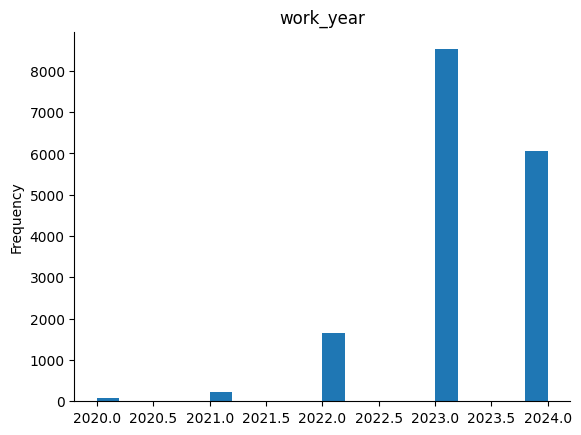

In [ ]:
# @title work_year

from matplotlib import pyplot as plt
data['work_year'].plot(kind='hist', bins=20, title='work_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

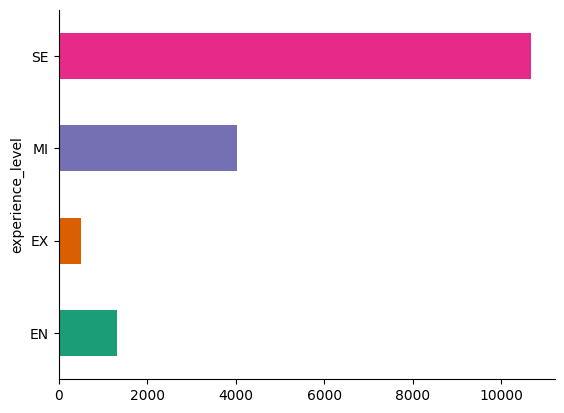

In [ ]:
# @title experience_level

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('experience_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

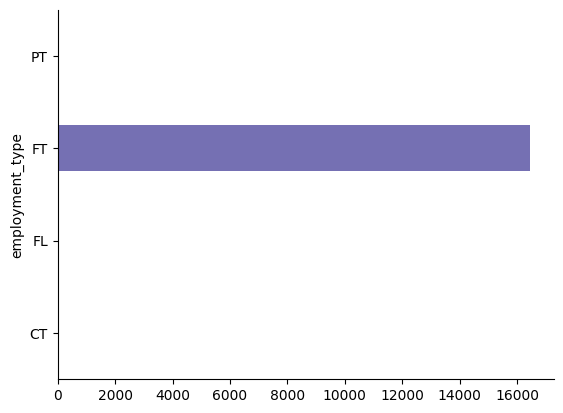

In [ ]:
# @title employment_type

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('employment_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

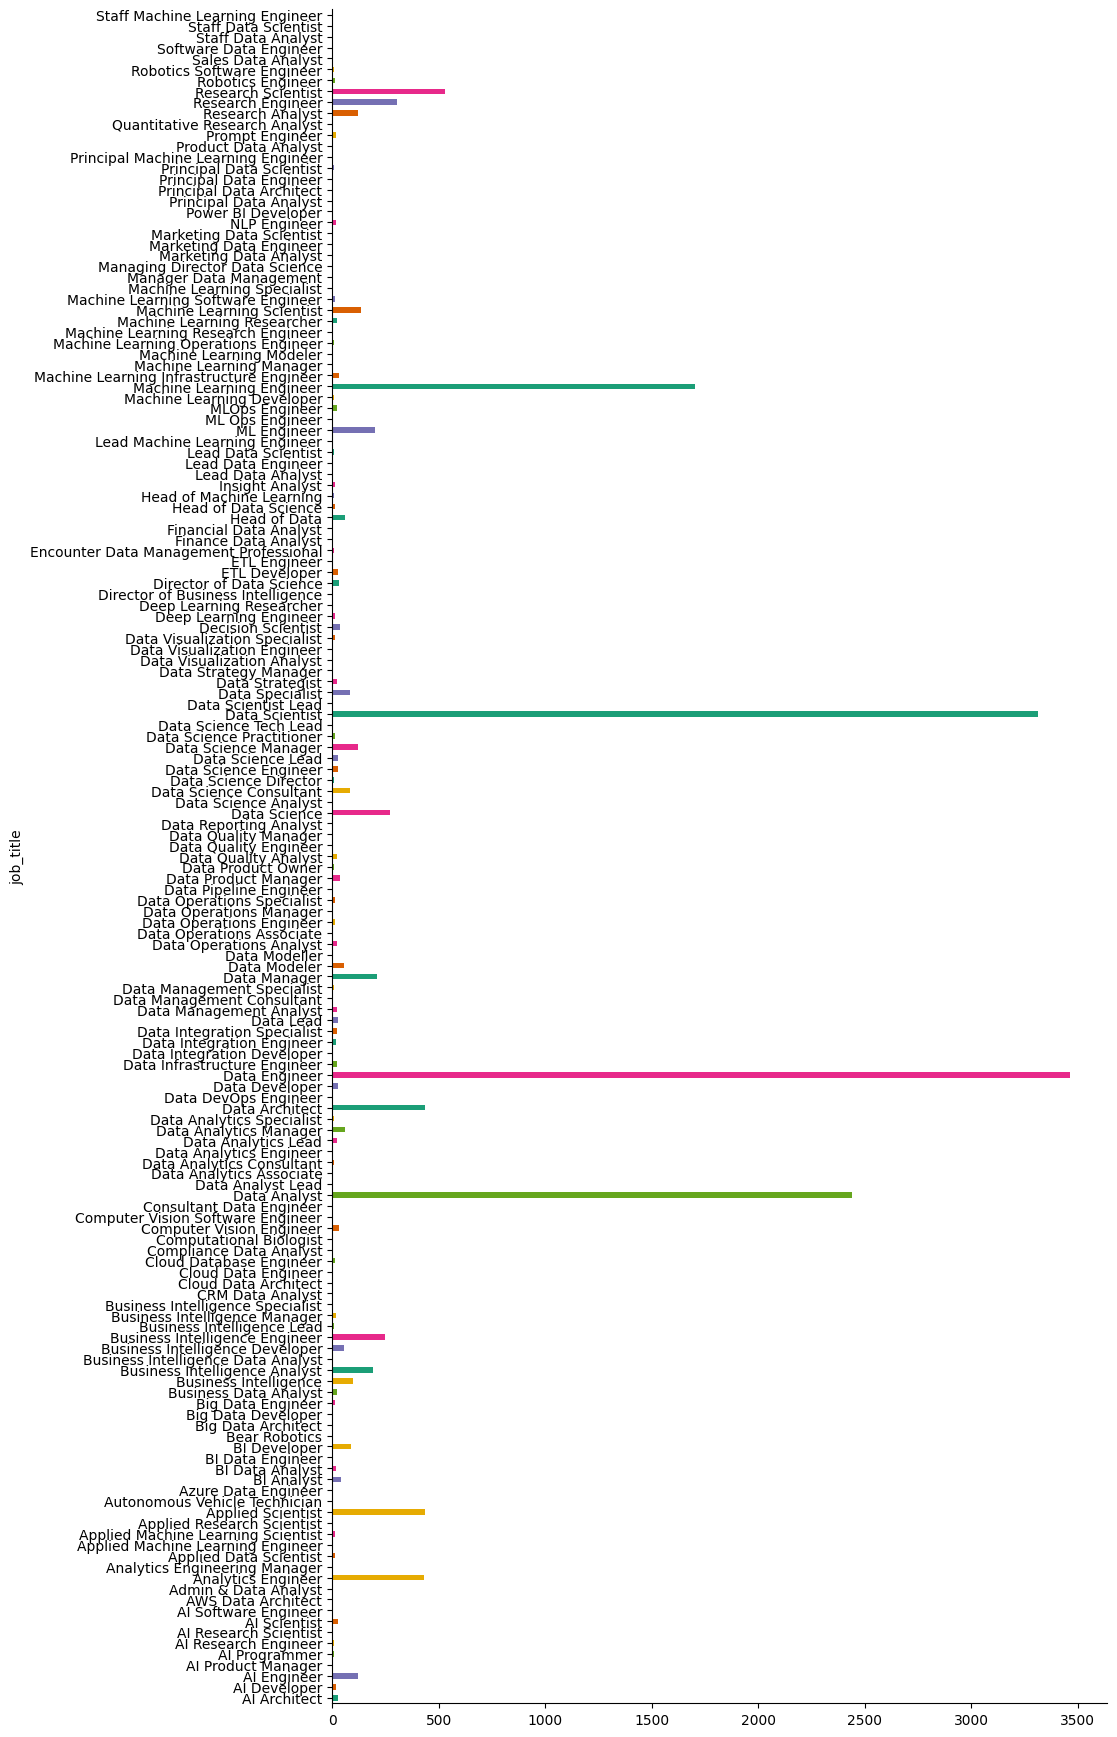

In [ ]:
plt.figure(figsize=(10, 22))
data.groupby('job_title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

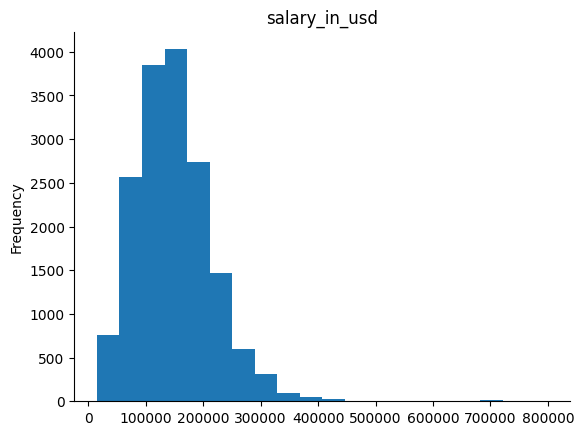

In [ ]:
# @title salary_in_usd

from matplotlib import pyplot as plt
data['salary_in_usd'].plot(kind='hist', bins=20, title='salary_in_usd')
plt.gca().spines[['top', 'right',]].set_visible(False)

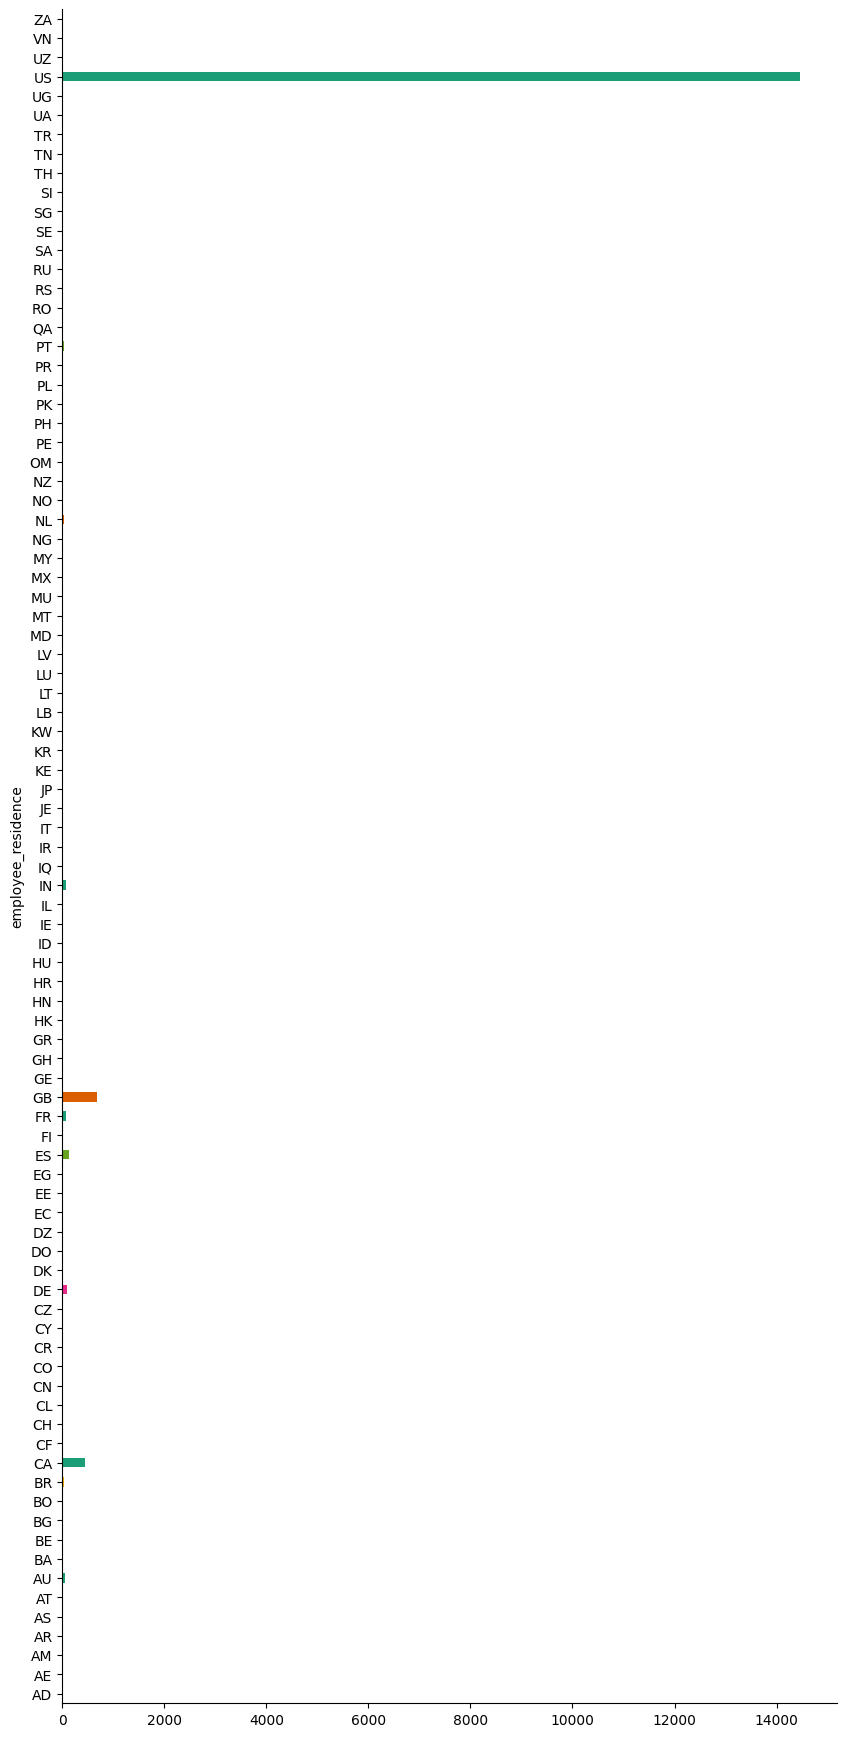

In [ ]:
plt.figure(figsize=(10, 22))
data.groupby('employee_residence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

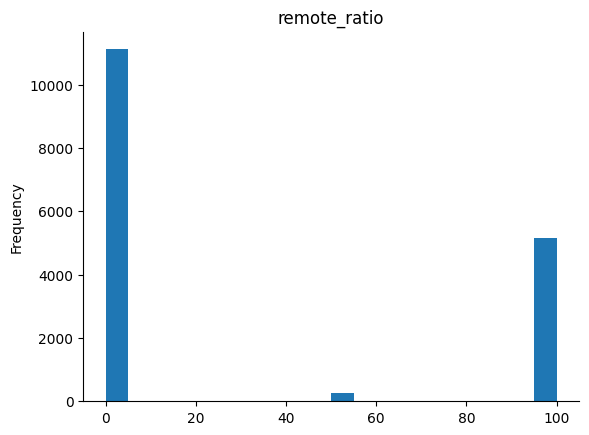

In [ ]:
# @title remote_ratio

from matplotlib import pyplot as plt
data['remote_ratio'].plot(kind='hist', bins=20, title='remote_ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

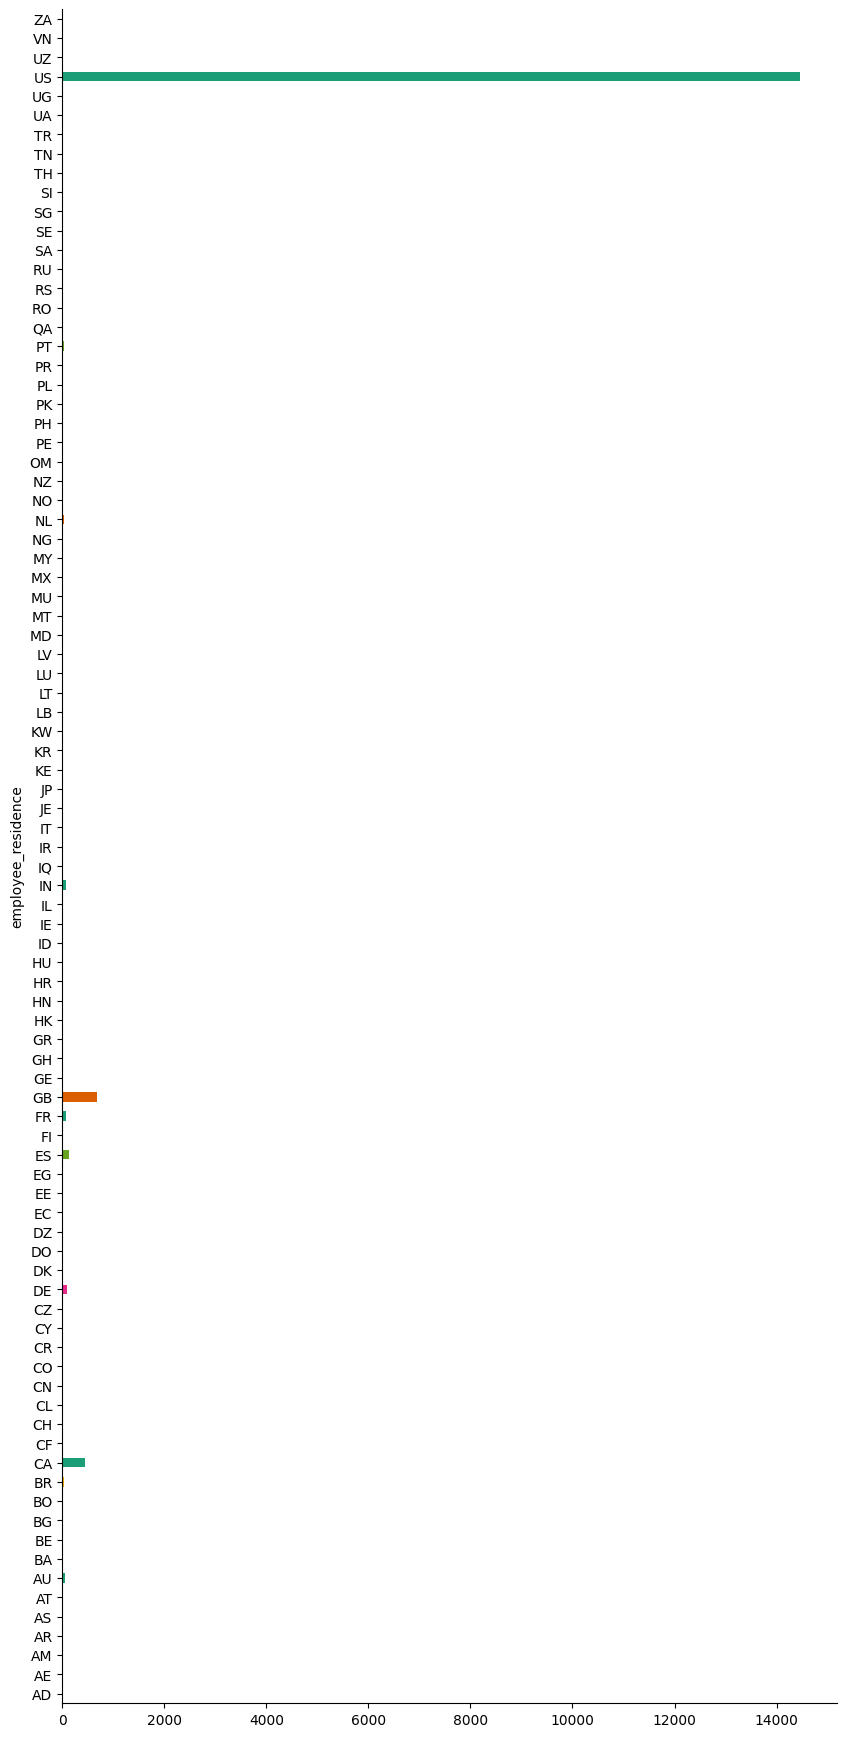

In [ ]:
plt.figure(figsize=(10, 22))
data.groupby('employee_residence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

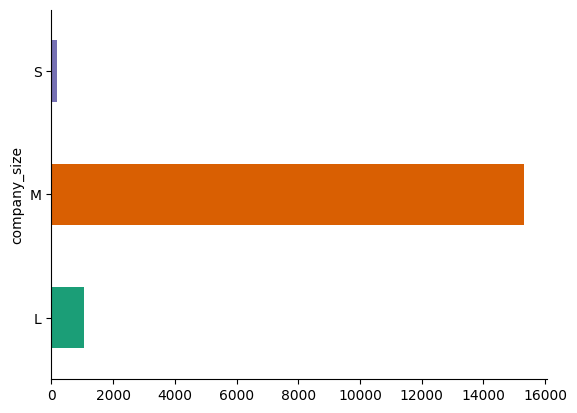

In [ ]:
# @title company_size

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('company_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# @title company_size

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('company_size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

1. Понятие машинного обучения. Отличие машинного обучения от других областей программирования.
Машинное обучение (ML) — это область искусственного интеллекта, направленная на разработку алгоритмов, которые позволяют компьютерам обучаться на данных и принимать решения или делать предсказания без явного программирования всех правил. Основная цель ML — создание моделей, которые могут обобщать информацию из данных и применять её для новых, ранее не встречавшихся данных.

Отличия от традиционного программирования:

Традиционное программирование: Программист пишет явные инструкции для выполнения задач.
Машинное обучение: Модель обучается на данных и выявляет закономерности самостоятельно, что позволяет ей выполнять задачи без явного программирования всех правил.
2. Классификация задач машинного обучения. Примеры задач из различных классов.
Основные классы задач:

Обучение с учителем (Supervised Learning):

Классификация: Определение категории, к которой принадлежит объект (например, классифи

Перевод категориальных данных в численные

In [ ]:
le = LabelEncoder()
for i in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']:
  data[i] = le.fit_transform(data[i])

Матрица корреляции

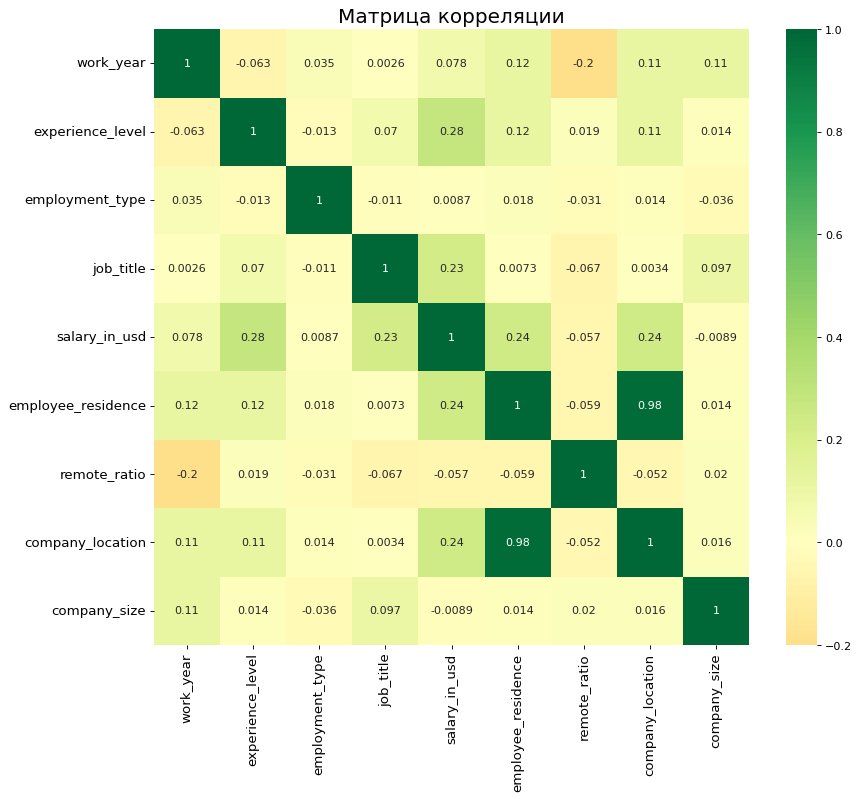

In [ ]:
columns_to_show = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'employee_residence', 'remote_ratio','company_location', 'company_size']

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data[columns_to_show].corr(), xticklabels=data[columns_to_show].corr().columns,
            yticklabels=data[columns_to_show].corr().columns,
            cmap='RdYlGn', center=0, annot=True)


plt.title('Матрица корреляции', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Видим что company_location и employee_residence взаимосвязаны,
удалим employee_residence так как у него выше колинеарность с другими признаками

In [ ]:
data = data.drop('employee_residence', axis=1)


больше всего влияет experience_level, меньше всего remote_ratio

Нормализация значений

In [ ]:
data['remote_ratio'] = data['remote_ratio'].replace({0: 0, 50: 0.5, 100: 1})

Разделение данных на тестовую и обучающию выборки

In [ ]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


Линейная регрессия

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, lin_pred)
mse = mean_squared_error(y_test, lin_pred)
mape = mean_absolute_percentage_error(y_test, lin_pred)
rmse = np.sqrt(mse)

In [ ]:
print("mae", mae, "mse", mse, "mape", mape, "rmse", rmse)

mae 48491.286399675446 mse 4647701794.336177 mape 0.39409424123851683 rmse 68174.0551407658


Деревья решений

In [ ]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
dec_pred = dec_tree.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, dec_pred)
mse = mean_squared_error(y_test, dec_pred)
mape = mean_absolute_percentage_error(y_test, dec_pred)
rmse = np.sqrt(mse)

In [ ]:
print("mae", mae, "mse", mse, "mape", mape, "rmse", rmse)

mae 43508.658849911124 mse 3934464593.2773566 mape 0.3237857337896985 rmse 62725.31062718906


Случайный лес

In [ ]:
ran_forest = RandomForestRegressor()
ran_forest.fit(X_train, y_train)
ran_pred = ran_forest.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, ran_pred)
mse = mean_squared_error(y_test, ran_pred)
mape = mean_absolute_percentage_error(y_test, ran_pred)
rmse = np.sqrt(mse)

In [ ]:
print("mae", mae, "mse", mse, "mape", mape, "rmse", rmse)

mae 42597.87986538903 mse 3788144445.096899 mape 0.31394453085208057 rmse 61547.903661269396


Градиентный бустинг

In [ ]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, ran_pred)
mse = mean_squared_error(y_test, ran_pred)
mape = mean_absolute_percentage_error(y_test, ran_pred)
rmse = np.sqrt(mse)

In [ ]:
print("mae", mae, "mse", mse, "mape", mape, "rmse", rmse)

mae 42597.87986538903 mse 3788144445.096899 mape 0.31394453085208057 rmse 61547.903661269396


Самая лучшая модель Градиентный бустинг и случайный лес

Кроссвалидация

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

model = RandomForestRegressor()

# Кросс-валидация с метриками MAE и MSE
scores_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
scores_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

print('MAE:', -scores_mae.mean())
print('MSE:', -scores_mse.mean())

MAE: 42288.42352129257
MSE: 3426539310.9268985


Оценка обучаемости модели

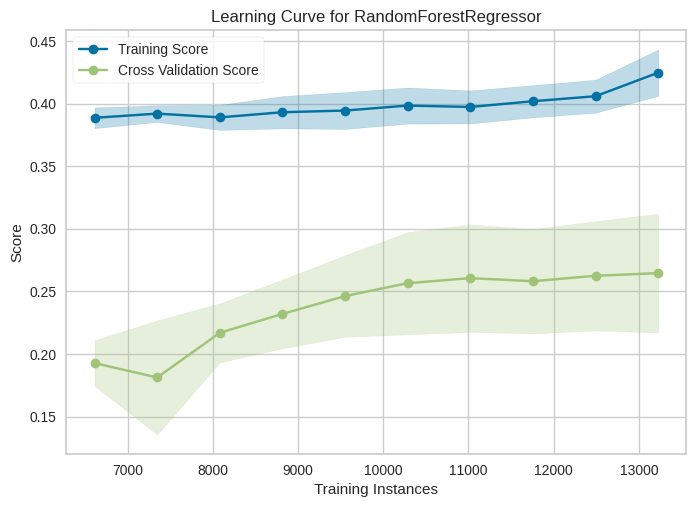

In [ ]:
from yellowbrick.model_selection import LearningCurve


visualizer = LearningCurve(
   RandomForestRegressor(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Подбор гиперпараметров

In [ ]:
model = RandomForestRegressor(random_state=0)


param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters:  {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
ran_pred = grid_search.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, ran_pred)
mse = mean_squared_error(y_test, ran_pred)
mape = mean_absolute_percentage_error(y_test, ran_pred)
rmse = np.sqrt(mse)

In [ ]:
print("mae", mae, "mse", mse, "mape", mape, "rmse", rmse)

mae 41503.80443462385 mse 3341402192.0861683 mape 0.3380362784173558 rmse 57804.86304876233


Результат улучшился:
мае примерно на 785
mse примерно на 1/39

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 

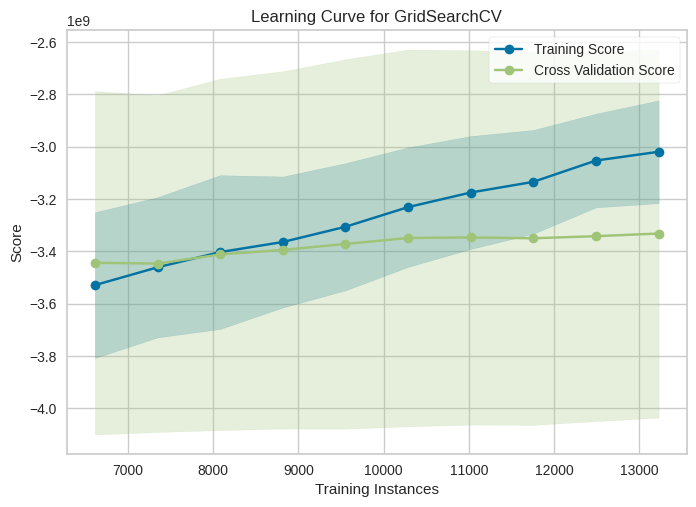

In [ ]:
visualizer = LearningCurve(
   grid_search, train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()